# walmart

In [1]:
import sys
sys.path.append('..')

In [2]:
# imoports
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import torch

/tmp/ipykernel_7309/665868124.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# constants

FEATURES_DATA_FILE = '../data/features.csv'
STORES_DATA_FILE = '../data/stores.csv'
TRAIN_DATA_FILE = '../data/train.csv'
TEST_DATA_FILE = '../data/test.csv'

## Load the data

In [4]:
features_df = pd.read_csv(FEATURES_DATA_FILE)
store_df = pd.read_csv(STORES_DATA_FILE)
train_original_df = pd.read_csv(TRAIN_DATA_FILE)

In [5]:
features_df["Date"] = features_df["Date"].apply(pd.to_datetime)
train_original_df["Date"] = train_original_df["Date"].apply(pd.to_datetime)

In [6]:
df = train_original_df.copy()

# Combine the tables

In [7]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
df = df.merge(store_df, on="Store")
df = df.merge(features_df, on=["Store", "Date"])
df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


In [11]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        print(column, df[column].isna().sum())
        df = df.drop(columns=[column])

df

MarkDown1 270889
MarkDown2 310322
MarkDown3 284479
MarkDown4 286603
MarkDown5 270138


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667,False


## First Describe of the data

In [12]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,False


In [13]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,136727.915739,60.090059,3.361027,171.201947,7.960289
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,34875.000000,-2.060000,2.472000,126.064000,3.879000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,93638.000000,46.680000,2.933000,132.022667,6.891000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,140167.000000,62.090000,3.452000,182.318780,7.866000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,202505.000000,74.280000,3.738000,212.416993,8.572000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,219622.000000,100.140000,4.468000,227.232807,14.313000
std,12.785297,30.492054,NaN,22711.183519,60980.583328,18.447931,0.458515,39.159276,1.863296


In [14]:
df["IsHoliday"] = df["IsHoliday_x"]
df = df.drop(columns=["IsHoliday_x", "IsHoliday_y"])

In [15]:
df["Store-Type"] = df["Type"]
df["Store-Size"] = df["Size"]

df = df.drop(columns=["Type", "Size"])

In [16]:
df["Store-Type"] = df["Store-Type"].map({'A': 1, 'B': 2, 'C': 3})

In [17]:
df

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,False,1,151315
1,1,1,2010-02-12,46039.49,38.51,2.548,211.242170,8.106,True,1,151315
2,1,1,2010-02-19,41595.55,39.93,2.514,211.289143,8.106,False,1,151315
3,1,1,2010-02-26,19403.54,46.63,2.561,211.319643,8.106,False,1,151315
4,1,1,2010-03-05,21827.90,46.50,2.625,211.350143,8.106,False,1,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,64.88,3.997,192.013558,8.684,False,2,118221
421566,45,98,2012-10-05,628.10,64.89,3.985,192.170412,8.667,False,2,118221
421567,45,98,2012-10-12,1061.02,54.47,4.000,192.327265,8.667,False,2,118221
421568,45,98,2012-10-19,760.01,56.47,3.969,192.330854,8.667,False,2,118221


In [18]:
df["index-2"] = df.index
df["Store-Dept"] = df["Store"].astype(str) + "-" + df["Dept"].astype(str)
df = df.sort_values(by=["Store-Dept", "Date"])

In [19]:
df["Weekly-Sales-last-week"] = df["Weekly_Sales"].shift(1)
df["Weekly-Diff"] = df["Weekly_Sales"] - df["Weekly_Sales"].shift(1)

df = df.drop(index=df.head(1).index)

In [20]:
df = df.drop(index=df[df["Store-Dept"] != df["Store-Dept"].shift(1)].index)

In [21]:
df.index = df["index-2"]
df = df.drop(columns=["index-2"])

In [22]:
df["IsHoliday"] = df["IsHoliday"].map({True: 1, False: 0})

In [23]:
df = df.drop(columns=["Store-Dept"])

In [24]:
df = df.drop(columns=["Weekly_Sales"])

In [25]:
df

,Store,Dept,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size,Weekly-Sales-last-week,Weekly-Diff
index-2,,,,,,,,,,,,
2,1,1,2010-02-19,39.93,2.514,211.289143,8.106,0,1,151315,46039.49,-4443.94
3,1,1,2010-02-26,46.63,2.561,211.319643,8.106,0,1,151315,41595.55,-22192.01
4,1,1,2010-03-05,46.50,2.625,211.350143,8.106,0,1,151315,19403.54,2424.36
5,1,1,2010-03-12,57.79,2.667,211.380643,8.106,0,1,151315,21827.90,-784.51
6,1,1,2010-03-19,54.58,2.720,211.215635,8.106,0,1,151315,21043.39,1093.25
...,...,...,...,...,...,...,...,...,...,...,...,...
87519,9,98,2011-12-16,47.31,3.159,222.882548,6.054,0,2,125833,75.77,-9.02
87520,9,98,2011-12-23,44.43,3.112,223.066113,6.054,0,2,125833,66.75,-41.25
87521,9,98,2012-01-06,47.54,3.157,223.433241,5.667,0,2,125833,25.50,-25.00


# split to train and test

In [26]:
sorted_dates = df.sort_values(by="Date")["Date"]
sorted_dates = sorted_dates.reset_index()["Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()

train_df = df[df["Date"] <= limit_date].copy()
test_df = df[df["Date"] > limit_date].copy()

train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [27]:
df["Date"].sort_values().unique()

<DatetimeArray>
['2010-02-12 00:00:00', '2010-02-19 00:00:00', '2010-02-26 00:00:00',
 '2010-03-05 00:00:00', '2010-03-12 00:00:00', '2010-03-19 00:00:00',
 '2010-03-26 00:00:00', '2010-04-02 00:00:00', '2010-04-09 00:00:00',
 '2010-04-16 00:00:00',
 ...
 '2012-08-24 00:00:00', '2012-08-31 00:00:00', '2012-09-07 00:00:00',
 '2012-09-14 00:00:00', '2012-09-21 00:00:00', '2012-09-28 00:00:00',
 '2012-10-05 00:00:00', '2012-10-12 00:00:00', '2012-10-19 00:00:00',
 '2012-10-26 00:00:00']
Length: 142, dtype: datetime64[ns]

In [28]:
train_df["Date"].sort_values().unique()

<DatetimeArray>
['2010-02-12 00:00:00', '2010-02-19 00:00:00', '2010-02-26 00:00:00',
 '2010-03-05 00:00:00', '2010-03-12 00:00:00', '2010-03-19 00:00:00',
 '2010-03-26 00:00:00', '2010-04-02 00:00:00', '2010-04-09 00:00:00',
 '2010-04-16 00:00:00',
 ...
 '2012-02-10 00:00:00', '2012-02-17 00:00:00', '2012-02-24 00:00:00',
 '2012-03-02 00:00:00', '2012-03-09 00:00:00', '2012-03-16 00:00:00',
 '2012-03-23 00:00:00', '2012-03-30 00:00:00', '2012-04-06 00:00:00',
 '2012-04-13 00:00:00']
Length: 114, dtype: datetime64[ns]

In [29]:
test_df["Date"].sort_values().unique()

<DatetimeArray>
['2012-04-20 00:00:00', '2012-04-27 00:00:00', '2012-05-04 00:00:00',
 '2012-05-11 00:00:00', '2012-05-18 00:00:00', '2012-05-25 00:00:00',
 '2012-06-01 00:00:00', '2012-06-08 00:00:00', '2012-06-15 00:00:00',
 '2012-06-22 00:00:00', '2012-06-29 00:00:00', '2012-07-06 00:00:00',
 '2012-07-13 00:00:00', '2012-07-20 00:00:00', '2012-07-27 00:00:00',
 '2012-08-03 00:00:00', '2012-08-10 00:00:00', '2012-08-17 00:00:00',
 '2012-08-24 00:00:00', '2012-08-31 00:00:00', '2012-09-07 00:00:00',
 '2012-09-14 00:00:00', '2012-09-21 00:00:00', '2012-09-28 00:00:00',
 '2012-10-05 00:00:00', '2012-10-12 00:00:00', '2012-10-19 00:00:00',
 '2012-10-26 00:00:00']
Length: 28, dtype: datetime64[ns]

In [30]:
mean_size = train_df["Store-Size"].mean()
std_size = train_df["Store-Size"].std()
train_df["Store-Size"] = (train_df["Store-Size"] - mean_size) / std_size
test_df["Store-Size"] = (test_df["Store-Size"] - mean_size) / std_size

In [31]:
train_df = train_df.drop(columns=["index-2"])
test_df = test_df.drop(columns=["index-2"])

In [32]:
train_df

,Store,Dept,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size,Weekly-Sales-last-week,Weekly-Diff
0,1,1,2010-02-19,39.93,2.514,211.289143,8.106,0,1,0.237497,46039.49,-4443.94
1,1,1,2010-02-26,46.63,2.561,211.319643,8.106,0,1,0.237497,41595.55,-22192.01
2,1,1,2010-03-05,46.50,2.625,211.350143,8.106,0,1,0.237497,19403.54,2424.36
3,1,1,2010-03-12,57.79,2.667,211.380643,8.106,0,1,0.237497,21827.90,-784.51
4,1,1,2010-03-19,54.58,2.720,211.215635,8.106,0,1,0.237497,21043.39,1093.25
...,...,...,...,...,...,...,...,...,...,...,...,...
335419,9,98,2011-12-09,37.65,3.158,222.656120,6.054,0,2,-0.180710,54.75,21.02
335420,9,98,2011-12-16,47.31,3.159,222.882548,6.054,0,2,-0.180710,75.77,-9.02
335421,9,98,2011-12-23,44.43,3.112,223.066113,6.054,0,2,-0.180710,66.75,-41.25
335422,9,98,2012-01-06,47.54,3.157,223.433241,5.667,0,2,-0.180710,25.50,-25.00


In [33]:
test_df

,Store,Dept,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Store-Type,Store-Size,Weekly-Sales-last-week,Weekly-Diff
0,1,1,2012-04-20,66.76,3.877,221.564074,7.143,0,1,0.237497,34684.21,-17708.02
1,1,1,2012-04-27,67.23,3.814,221.617937,7.143,0,1,0.237497,16976.19,-628.59
2,1,1,2012-05-04,75.55,3.749,221.671800,7.143,0,1,0.237497,16347.60,799.84
3,1,1,2012-05-11,73.77,3.688,221.725663,7.143,0,1,0.237497,17147.44,1016.76
4,1,1,2012-05-18,70.33,3.630,221.742674,7.143,0,1,0.237497,18164.20,353.59
...,...,...,...,...,...,...,...,...,...,...,...,...
82809,9,96,2012-10-05,66.61,3.617,226.966232,4.954,0,2,-0.180710,3763.21,543.22
82810,9,96,2012-10-12,60.09,3.601,227.169392,4.954,0,2,-0.180710,4306.43,-630.44
82811,9,96,2012-10-19,68.01,3.594,227.214288,4.954,0,2,-0.180710,3675.99,-135.94
82812,9,96,2012-10-26,69.52,3.506,227.232807,4.954,0,2,-0.180710,3540.05,1212.20


# Model 1

In [34]:
train_1_df = train_df.copy()
test_1_df = test_df.copy()

In [35]:
for store in store_df["Store"].unique():
    train_1_df["Store-" + str(store)] = (train_1_df["Store"] == store).map({True: 1, False: 0})
    test_1_df["Store-" + str(store)] = (test_1_df["Store"] == store).map({True: 1, False: 0})

for dept in train_1_df["Dept"].unique():
    train_1_df["Dept-" + str(dept)] = (train_1_df["Dept"] == dept).map({True: 1, False: 0})
    test_1_df["Dept-" + str(dept)] = (test_1_df["Dept"] == dept).map({True: 1, False: 0})

/tmp/ipykernel_7309/2157136067.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_1_df["Dept-" + str(dept)] = (train_1_df["Dept"] == dept).map({True: 1, False: 0})
/tmp/ipykernel_7309/2157136067.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_1_df["Dept-" + str(dept)] = (test_1_df["Dept"] == dept).map({True: 1, False: 0})
/tmp/ipykernel_7309/2157136067.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

In [36]:
train_1_df = train_1_df.drop(columns=["Store", "Dept"])

In [37]:
test_1_df = test_1_df.drop(columns=["Store", "Dept"])

In [38]:
train_1_df.columns

Index(['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday',
       'Store-Type', 'Store-Size', 'Weekly-Sales-last-week', 'Weekly-Diff',
       ...
       'Dept-94', 'Dept-95', 'Dept-96', 'Dept-97', 'Dept-98', 'Dept-99',
       'Dept-50', 'Dept-43', 'Dept-39', 'Dept-65'],
      dtype='object', length=136)

In [39]:
train_1_df.columns.size, test_1_df.columns.size

(136, 136)

In [40]:
x_train = train_1_df.drop(columns=["Weekly-Diff"])
y_train = train_1_df["Weekly-Diff"]

x_test = test_1_df.drop(columns=["Weekly-Diff"])
y_test = test_1_df["Weekly-Diff"]

In [41]:
mean_size = y_train.mean()
std_size = y_train.std()

y_train = (y_train - mean_size) / std_size
y_test = (y_test - mean_size) / std_size

In [42]:
x_train["Date"] = x_train["Date"].apply(lambda x: x.value)
x_test["Date"] = x_test["Date"].apply(lambda x: x.value)

In [43]:
for column in x_train.columns:
    x_train[column] = x_train[column].astype(float)
    x_test[column] = x_test[column].astype(float)


In [44]:
y_train

0        -0.564178
1        -2.822179
2         0.309642
3        -0.098607
4         0.140291
            ...   
335419    0.003877
335420    0.000055
335421   -0.004045
335422   -0.001978
335423    0.001012
Name: Weekly-Diff, Length: 335424, dtype: float64

In [45]:
x_train_df = x_train.copy()
y_train_df = y_train.copy()

x_test_df = x_test.copy()
y_test_df = y_test.copy()

In [46]:
x_train = torch.tensor(x_train_df.values, dtype=torch.float32)
y_train = torch.tensor(y_train_df.values, dtype=torch.float32)

x_test = torch.tensor(x_test_df.values, dtype=torch.float32)
y_test = torch.tensor(y_test_df.values, dtype=torch.float32)

In [47]:
x_train.shape[1]

135

In [84]:
x_train = np.ndarray(x_train_df.values.shape)
y_train = np.ndarray(y_train_df.values.shape)
x_test = np.ndarray(x_test_df.values.shape)
y_test = np.ndarray(y_test_df.values.shape)

for i in range(x_train.shape[0]):
    x_train[i, :] = i

for i in range(y_train.shape[0]):
    y_train[i] = i

for i in range(x_test.shape[0]):
    x_test[i, :] = i + y_train.max()

for i in range(y_test.shape[0]):
    y_test[i] = i + y_train.max()

x_train.shape, y_train.shape

((335424, 135), (335424,))

In [85]:
mean_size = y_train.mean()
std_size = y_train.std()

y_train = (y_train - mean_size) / std_size
y_test = (y_test - mean_size) / std_size

for column in range(x_train.shape[1]):
    if x_train[:, column].max() > 1:
        mean_size = x_train[:, column].mean()
        std_size = x_train[:, column].std()

        x_train[:, column] = (x_train[:, column] - mean_size) / std_size
        x_test[:, column] = (x_test[:, column] - mean_size) / std_size


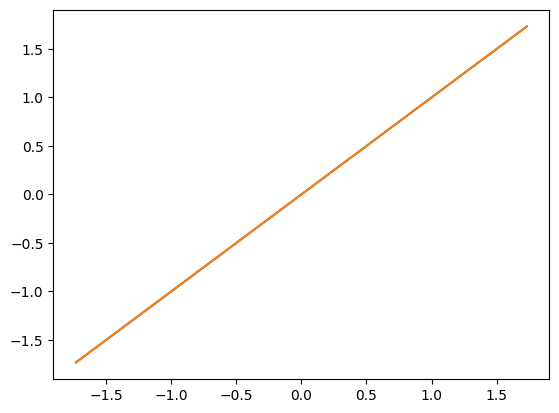

In [86]:
plt.plot(x_train[:,0], y_train)
plt.plot(x_train[:,1], y_train)

In [87]:
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [88]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize: int):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, 1)

    def forward(self, x):
        out = self.linear(x)
        return out

In [89]:
model1 = linearRegression(x_train.shape[1])

# Train the model
num_epochs = 100
batch_size = 128
lr = 0.01

# Training the Model
criterion = torch.nn.MSELoss()

# Define an optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model1.parameters(), lr=lr)

train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

i = 0

for epoch in range(num_epochs):
    running_loss = 0

    for batch in train_loader:
        inputs, targets = batch

        # Forward pass
        outputs = model1(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 1000 == 0:
            print(f'Step [{i}], Loss: {loss.item():.4f}')
        
        i += 1
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


/tmp/ipykernel_7309/1831766188.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
/home/omer/anaconda3/envs/urinakysis-analysis/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Step [0], Loss: 0.9821
Step [1000], Loss: nan
Step [2000], Loss: nan


/home/omer/anaconda3/envs/urinakysis-analysis/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Step [3000], Loss: nan
Step [4000], Loss: nan
Step [5000], Loss: nan
Step [6000], Loss: nan
Step [7000], Loss: nan
Step [8000], Loss: nan
Step [9000], Loss: nan
Step [10000], Loss: nan
Step [11000], Loss: nan
Step [12000], Loss: nan
Step [13000], Loss: nan
Step [14000], Loss: nan
Step [15000], Loss: nan
Step [16000], Loss: nan
Step [17000], Loss: nan
Step [18000], Loss: nan
Step [19000], Loss: nan
Step [20000], Loss: nan
Step [21000], Loss: nan
Step [22000], Loss: nan
Step [23000], Loss: nan
Step [24000], Loss: nan
Step [25000], Loss: nan
Step [26000], Loss: nan
Epoch [10/100], Loss: nan
Step [27000], Loss: nan
Step [28000], Loss: nan
Step [29000], Loss: nan
Step [30000], Loss: nan
Step [31000], Loss: nan
Step [32000], Loss: nan
Step [33000], Loss: nan
Step [34000], Loss: nan
Step [35000], Loss: nan
Step [36000], Loss: nan
Step [37000], Loss: nan
Step [38000], Loss: nan
Step [39000], Loss: nan
Step [40000], Loss: nan
Step [41000], Loss: nan
Step [42000], Loss: nan
Step [43000], Loss: n

KeyboardInterrupt: 